<a href="https://colab.research.google.com/github/clementsiegrist/reco_formes/blob/main/fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
pip install torch torchvision tensorflow keras anfis pyfuzzylite scikit-fuzzy numpy pandas matplotlib opencv-python pillow

In [40]:
import torch
import torchvision
import tensorflow as tf
import keras 
#import anfis 
import fuzzylite as fl
import skfuzzy as fuzz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

**Brief vizualization of fuzzy membership function**

Introducing scikit-fuzzy library, visualizing a simple Fuzzy OR rule based on two triangular membership functions.

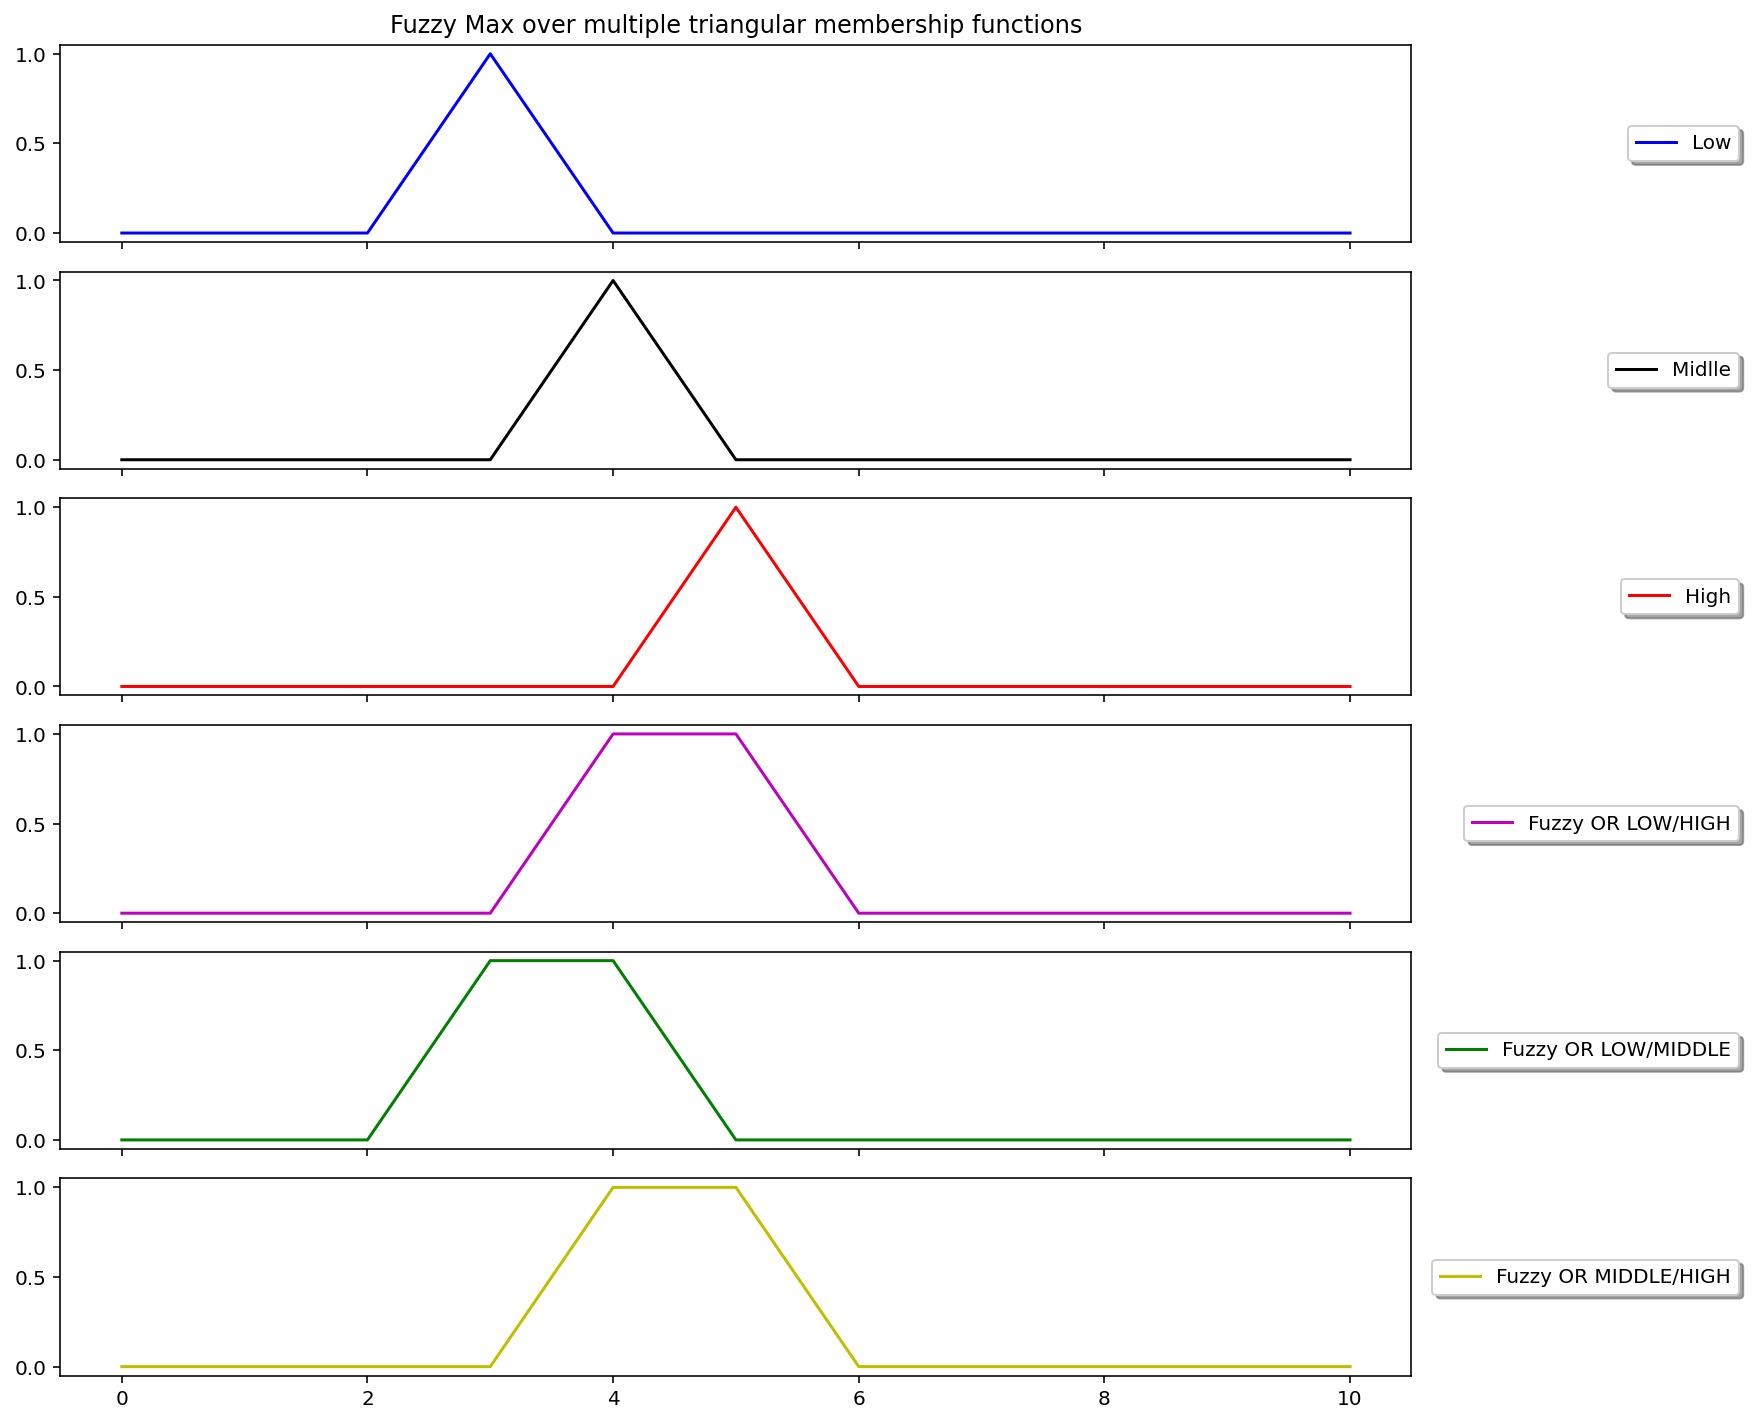

In [32]:
# Defining numpy array
x_qual = np.arange(0, 11, 1)

# Defining the numpy array for Traingular membership functions
qual_lo = fuzz.trimf(x_qual, [2, 3, 4])
qual_md = fuzz.trimf(x_qual, [3, 4, 5])
qual_hi = fuzz.trimf(x_qual, [4, 5, 6])
max = fuzz.fuzzy_or(x_qual, qual_lo, x_qual, qual_hi)
max1 = fuzz.fuzzy_or(x_qual, qual_lo, x_qual, qual_md)
max2 = max = fuzz.fuzzy_or(x_qual, qual_md, x_qual, qual_hi)

# Plot the results
fig, ax = plt.subplots(6, 1, figsize=(10,10), sharex=True, sharey=True)
ax[0].plot(x_qual, qual_lo, 'b', label='Low')
ax[1].plot(x_qual, qual_md, 'k', label='Midlle')
ax[2].plot(x_qual, qual_hi, 'r', label='High')
ax[3].plot(max[0], max[1], 'm', label='Fuzzy OR LOW/HIGH')
ax[4].plot(max1[0], max1[1], 'g', label='Fuzzy OR LOW/MIDDLE')
ax[5].plot(max2[0], max2[1], 'y', label='Fuzzy OR MIDDLE/HIGH')
ax[0].set_title('Fuzzy Max over multiple triangular membership functions')
plt.tight_layout()
ax[0].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
ax[1].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
ax[2].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
ax[3].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
ax[4].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
ax[5].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
fig.show()

In [33]:
import torch
import torchvision
import torchvision.transforms as transforms

In [34]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)


##########################################################################
#    Chargement/telechargement de la base de TRAIN de CIFARE10           #
##########################################################################

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

##########################################################################
#    Chargement/telechargement de la base de TEST de CIFARE10            #
##########################################################################

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

##########################################################################
#   Definition du module pour parcourir les donnees                      #
# Paramètres:                                                            #
#       - Batchsize (nb d'images qui passent en une fois avant retropropagation)#
#       - shuffle (ordre de passage aléatoire des images) :              #
#                   Vrai      ---> lors de l'entraînement                #
#                   Faux/Vrai ---> lors du test                          #
#                                                                        #
# * On va creer 2 modules : un pour le TRAIN et un pour le TEST          #
##########################################################################

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=False, num_workers=2)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


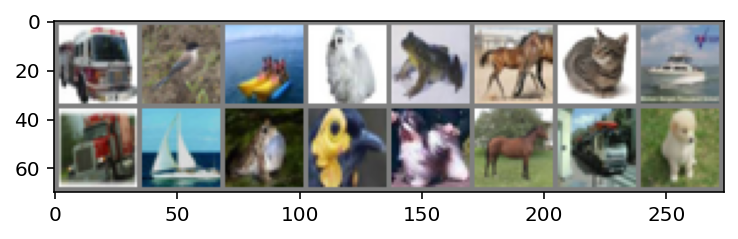

truck  bird  ship   dog  frog horse   cat  ship truck  ship  frog  bird   dog horse truck   dog


In [35]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    ##########################################################################################
    #   Il faut transposée les images car PyTorch lis les image en [Chanels, Width, Height]  #
    #   et pour les voir il faut qu'elles soient [Width, Height, Chanels]                    #
    ##########################################################################################
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(16)))

In [39]:
import anfis
from anfis.membership import membershipfunction, mfDerivs
import numpy
from anfis.anfis import ANFIS

ts = numpy.loadtxt("/content/anfis/trainingSet.txt", usecols=[1,2,3])
X = ts[:,0:2]
Y = ts[:,2]

mf = [[['gaussmf',{'mean':0.,'sigma':1.}],
       ['gaussmf',{'mean':-1.,'sigma':2.}],
       ['gaussmf',{'mean':-4.,'sigma':10.}],
       ['gaussmf',{'mean':-7.,'sigma':7.}]],
      
       [['gaussmf',{'mean':1.,'sigma':2.}],
        ['gaussmf',{'mean':2.,'sigma':3.}],
        ['gaussmf',{'mean':-2.,'sigma':10.}],
        ['gaussmf',{'mean':-10.5,'sigma':5.}]]]


mfc = membershipfunction.MemFuncs(mf)
anf = ANFIS(images, labels, mfc)#(X, Y, mfc)
anf.trainHybridJangOffLine(epochs=20)
print(round(anf.consequents[-1][0],6))
print(round(anf.consequents[-2][0],6))
print(round(anf.fittedValues[9][0],6))

if round(anf.consequents[-1][0],6) == -5.275538 and round(anf.consequents[-2][0],6) == -1.990703 and round(anf.fittedValues[9][0],6) == 0.002249:
	 print('test is good')
  
anf.plotErrors()
anf.plotResults()

Number of variables does not match number of rule sets


IndexError: ignored